In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sbn

In [3]:

# Load the Fashion-MNIST training dataset from the CSV file using pandas
train_df = pd.read_csv('fashion-mnist_train.csv')

# Load the Fashion-MNIST testing dataset from the CSV file using pandas
test_df = pd.read_csv('fashion-mnist_test.csv')

# Extract the features and labels from the training dataset
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

# Extract the features and labels from the testing dataset
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values




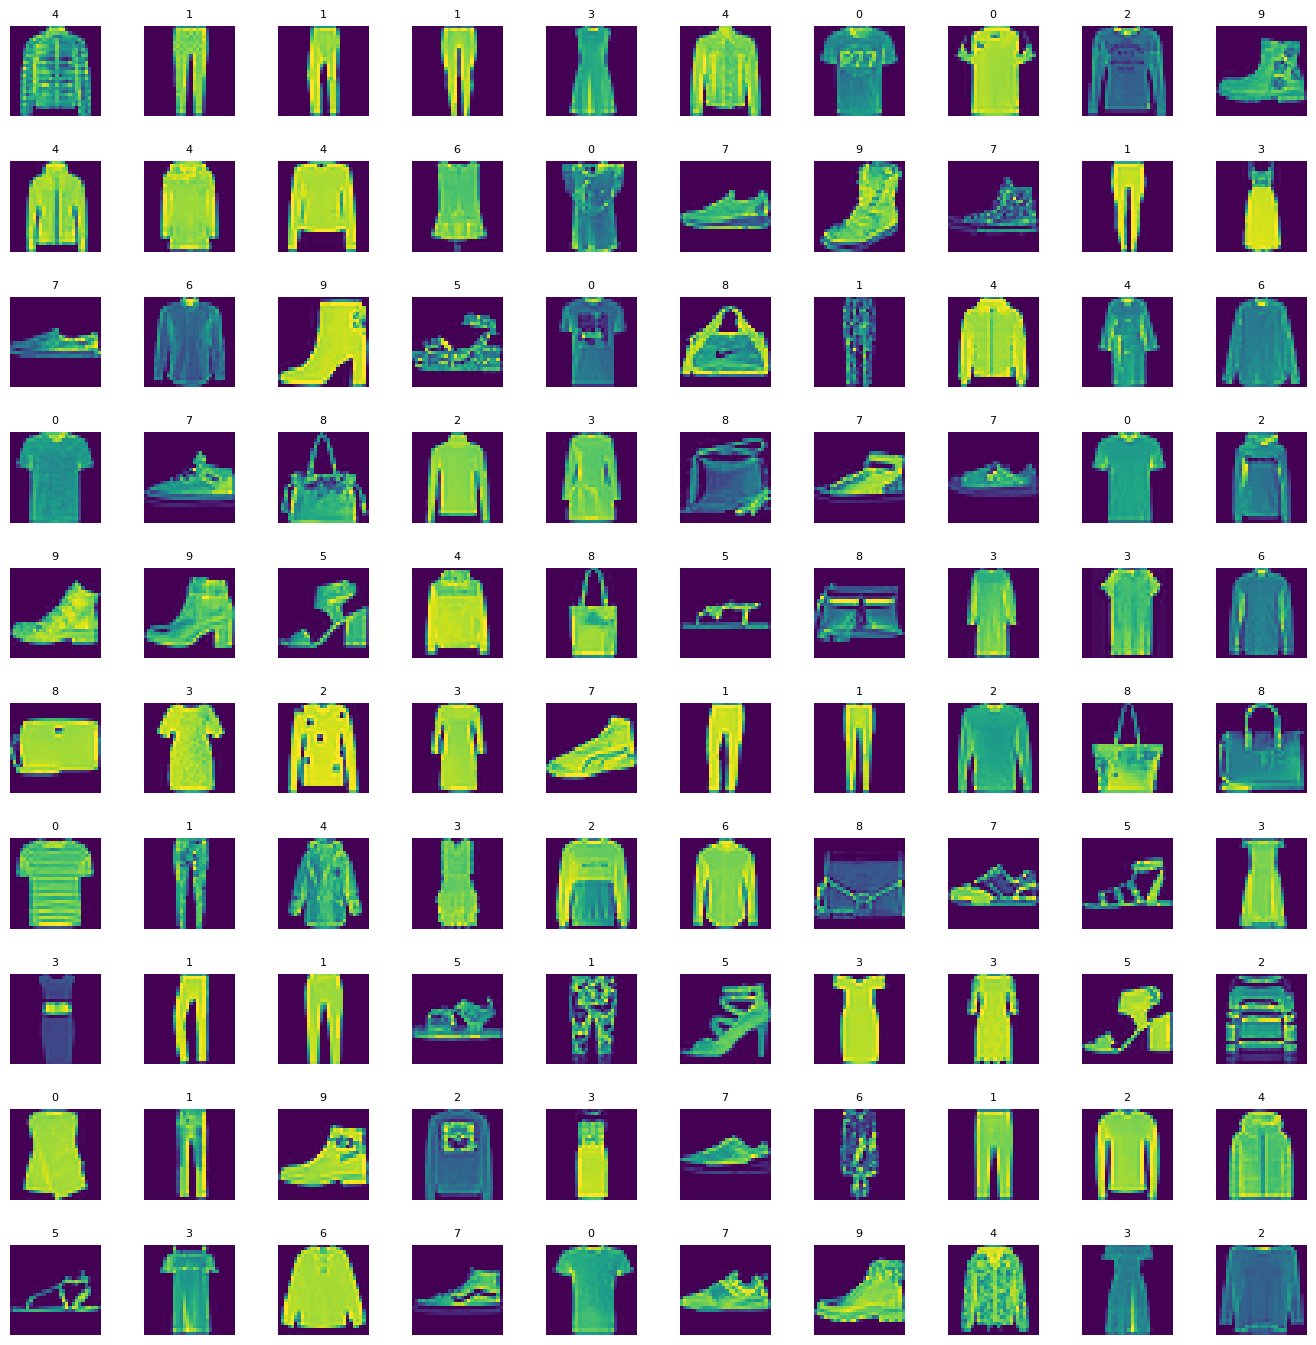

In [16]:
training = np.asarray(train_df , dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [4]:
# Reshape the features into images (28x28)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values to the range of 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [5]:
# Create the convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



2023-05-25 07:49:40.741221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Epoch 1/10
469/469 [==============================] - 45s 94ms/step - loss: 0.5778 - accuracy: 0.7899 - val_loss: 0.3928 - val_accuracy: 0.8594
Epoch 2/10
469/469 [==============================] - 41s 87ms/step - loss: 0.3704 - accuracy: 0.8680 - val_loss: 0.3265 - val_accuracy: 0.8855
Epoch 3/10
469/469 [==============================] - 42s 89ms/step - loss: 0.3214 - accuracy: 0.8843 - val_loss: 0.3138 - val_accuracy: 0.8883
Epoch 4/10
469/469 [==============================] - 47s 99ms/step - loss: 0.2918 - accuracy: 0.8950 - val_loss: 0.2825 - val_accuracy: 0.8994
Epoch 5/10
469/469 [==============================] - 46s 98ms/step - loss: 0.2694 - accuracy: 0.9032 - val_loss: 0.2661 - val_accuracy: 0.9066
Epoch 6/10
469/469 [==============================] - 87s 186ms/step - loss: 0.2498 - accuracy: 0.9092 - val_loss: 0.2599 - val_accuracy: 0.9060
Epoch 7/10
469/469 [==============================] - 81s 173ms/step - loss: 0.2330 - accuracy: 0.9152 - val_loss: 0.2466 - val_accurac

In [8]:

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')



313/313 [==============================] - 2s 7ms/step - loss: 0.2561 - accuracy: 0.9070
Test loss: 0.2561
Test accuracy: 0.9070


In [12]:
# Predict the classes for the testing data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)



313/313 [==============================] - 2s 7ms/step


Confusion Matrix:


<AxesSubplot: >

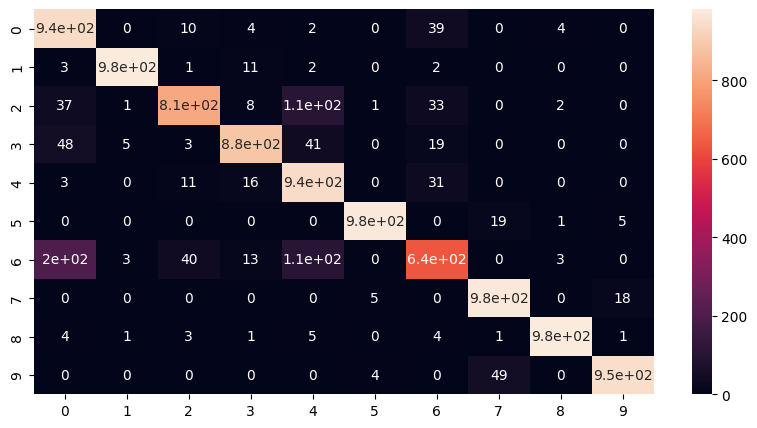

In [22]:
# Print the confusion matrix
confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(10,5))
sbn.heatmap(confusion, annot=True)

In [14]:
# Print the classification report
classification = classification_report(np.argmax(y_test, axis=1), y_pred)
print('Classification Report:')
print(classification)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.81      0.86      1000
           3       0.94      0.88      0.91      1000
           4       0.78      0.94      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.83      0.64      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

